
##European Social Survey

This is a biannual survey to measure the attitudes, beliefs and behavior patterns of the various populations in Europe from the 2012 and 2014.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import math

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
ess = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/ess_combined_2012_2014.csv')

In [3]:
ess.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5,6,3,3,10,5,8,5,4,2,60,1
1,CH,25,6,6,5,7,5,9,3,2,2,59,1
2,CH,26,6,1,8,8,8,7,6,3,1,24,2
3,CH,28,6,4,6,6,7,10,6,2,2,64,1
4,CH,29,6,5,6,7,5,8,7,2,2,55,1


In [4]:
ess.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8147 entries, 0 to 8146
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   cntry    8147 non-null   object
 1   idno     8147 non-null   int64 
 2   year     8147 non-null   int64 
 3   tvtot    8147 non-null   int64 
 4   ppltrst  8147 non-null   int64 
 5   pplfair  8147 non-null   int64 
 6   pplhlp   8147 non-null   int64 
 7   happy    8147 non-null   int64 
 8   sclmeet  8147 non-null   int64 
 9   sclact   8147 non-null   int64 
 10  gndr     8147 non-null   int64 
 11  agea     8147 non-null   int64 
 12  partner  8147 non-null   int64 
dtypes: int64(12), object(1)
memory usage: 827.6+ KB




###1. Did people become less trusting from 2012 to 2014?


2012 is denoted in the notes as year '6' and 2014 is denoted in the notes as year '7'

In [5]:
ess2012 = ess[ess['year']==6]
ess2014 = ess[ess['year']==7]

ess2012.info()
ess2014.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4071 entries, 0 to 7279
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   cntry    4071 non-null   object
 1   idno     4071 non-null   int64 
 2   year     4071 non-null   int64 
 3   tvtot    4071 non-null   int64 
 4   ppltrst  4071 non-null   int64 
 5   pplfair  4071 non-null   int64 
 6   pplhlp   4071 non-null   int64 
 7   happy    4071 non-null   int64 
 8   sclmeet  4071 non-null   int64 
 9   sclact   4071 non-null   int64 
 10  gndr     4071 non-null   int64 
 11  agea     4071 non-null   int64 
 12  partner  4071 non-null   int64 
dtypes: int64(12), object(1)
memory usage: 445.3+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 4076 entries, 732 to 8146
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   cntry    4076 non-null   object
 1   idno     4076 non-null   int64 
 2   year     4076 non-null 

In [6]:
mean_trust_12 = ess2012['ppltrst'].mean()
mean_trust_14 = ess2014['ppltrst'].mean()

print(mean_trust_12)
print(mean_trust_14)

5.578481945467944
5.5713935230618254


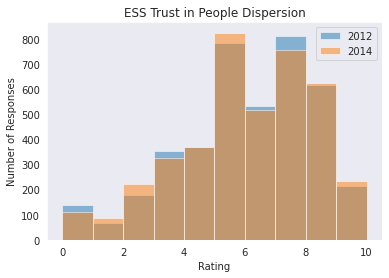

In [7]:
sns.set_style('dark')
plt.hist(ess2012['ppltrst'], alpha=.5, label='2012')
plt.hist(ess2014['ppltrst'], alpha=.5, label='2014')
plt.ylabel('Number of Responses')
plt.xlabel('Rating')
plt.title('ESS Trust in People Dispersion')
plt.legend();

Data may not be normally distributed...

In [8]:
print(stats.describe(ess2012['ppltrst']))
print(stats.describe(ess2014['ppltrst']))

DescribeResult(nobs=4071, minmax=(0, 10), mean=5.578481945467944, variance=4.893040545067073, skewness=-0.5431086926347095, kurtosis=-0.1210956960964813)
DescribeResult(nobs=4076, minmax=(0, 10), mean=5.5713935230618254, variance=4.927171652708959, skewness=-0.4601859476512641, kurtosis=-0.25006786100787215)


...but everything seems to be in acceptable ranges!

Let's do a box plot for this

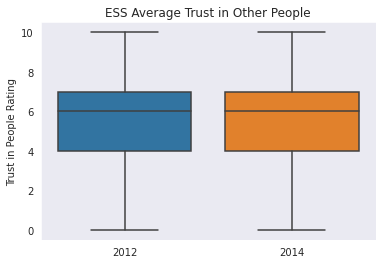

In [9]:
sns.set_style('dark')
sns.boxplot('year', 'ppltrst', data=ess)
plt.title('ESS Average Trust in Other People')
plt.xlabel('')
plt.ylabel('Trust in People Rating')
plt.xticks(np.arange(2), (2012,2014));

Results look very similar visually. Let see what a t-test states. 

In [10]:
stats.ttest_ind(ess2012['ppltrst'],ess2014['ppltrst'],)

Ttest_indResult(statistic=0.1443685081969842, pvalue=0.8852130548889106)

We have a high p-value so we are unable to reject the null hypothesis. These data sets do not differ enough (or much at all) for any significance

###2. Did people become happier from 2012 to 2014?


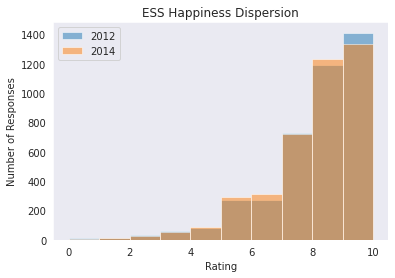

In [11]:
sns.set_style('dark')
plt.hist(ess2012['happy'], alpha=.5, label='2012')
plt.hist(ess2014['happy'], alpha=.5, label='2014')
plt.ylabel('Number of Responses')
plt.xlabel('Rating')
plt.title('ESS Happiness Dispersion')
plt.legend();

It is pretty clear that these variables are not normally distributed

In [12]:
stats.kruskal(ess2012['happy'], ess2014['happy'])

KruskalResult(statistic=3.725441202182227, pvalue=0.05358946830655459)

The p-value is not significant indicating that there is no change in happiness from 2012 - 2014

###3. Pick three or four of the countries in the sample and compare how often people met socially in 2014. Are there differences, and if so, which countries stand out?


In [13]:
ess['cntry'].unique()

array(['CH', 'CZ', 'DE', 'ES', 'NO', 'SE'], dtype=object)

According to the notes, this is Switzerland, Czech Republic, Germany, Spain, Norway, Sweden

I will choose Sweden, Spain, Germany and Czech Republic (SE, ES, DE, CZ)

In [14]:
countries = ['SE', 'ES', 'DE', 'CZ']
cntry_ess = ess[(ess['year']==7) & (ess['cntry'].isin(countries))]
cntry_ess.cntry.unique()

array(['CZ', 'DE', 'ES', 'SE'], dtype=object)

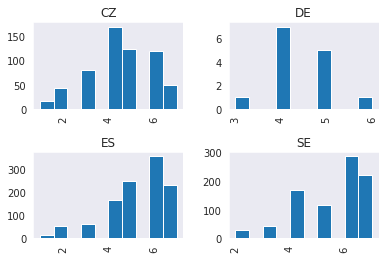

In [15]:
cntry_ess['sclmeet'].hist(by=cntry_ess['cntry']);

ES, SE, DE do not look normally distributed, CZ may be normall distributed, and it doesn't look like Germany had many responses at all.

In [16]:
cntry_ess['sclmeet'].groupby(cntry_ess['cntry']).count()

cntry
CZ     606
DE      14
ES    1134
SE     867
Name: sclmeet, dtype: int64

We will leave Germany out as our ideal would be to have > 30 data points

In [0]:
countries = ['SE', 'ES', 'CZ']
cntry_ess = ess[(ess['year']==7) & (ess['cntry'].isin(countries))]

In [0]:
CZ_ess = cntry_ess[cntry_ess['cntry']=='CZ']
ES_ess = cntry_ess[cntry_ess['cntry']=='ES']
SE_ess = cntry_ess[cntry_ess['cntry']=='SE']

In [19]:
print(stats.describe(CZ_ess['sclmeet']))
print(stats.describe(ES_ess['sclmeet'])) 
print(stats.describe(SE_ess['sclmeet']))

DescribeResult(nobs=606, minmax=(1, 7), mean=4.4950495049504955, variance=2.164438262008019, skewness=-0.22873689943815514, kurtosis=-0.49084441486724817)
DescribeResult(nobs=1134, minmax=(1, 7), mean=5.263668430335097, variance=2.067222541332574, skewness=-0.8331602682762435, kurtosis=0.2132945592754396)
DescribeResult(nobs=867, minmax=(2, 7), mean=5.434832756632065, variance=1.8788314673784199, skewness=-0.6751138160495723, kurtosis=-0.4024683071086881)


All samples look to be normally distributed, let's run an ANOVA

In [20]:
stats.f_oneway(CZ_ess['sclmeet'],ES_ess['sclmeet'],SE_ess['sclmeet'])

F_onewayResult(statistic=85.03811666631785, pvalue=1.67652480854007e-36)

The ANOVA returned significant results. Let's run a Tukey HSD to see which of the 

In [0]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(endog = cntry_ess['sclmeet'],  #the variable we want to study
                          groups = cntry_ess['cntry'],     #the groups we're comparing
                          alpha = .05) 

In [22]:
tukey.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
CZ,ES,0.7686,0.001,0.6006,0.9366,True
CZ,SE,0.9398,0.001,0.763,1.1166,True
ES,SE,0.1712,0.0212,0.0205,0.3218,True


Looks like we can reject the null for all pairs, but see below as CZ seems to be the odd one out.

In [23]:
print(f'The most popular answer for social meet ups in CZ was {int(CZ_ess.sclmeet.mode())}')
print(f'The most popular answer for social meet ups in ES was {int(ES_ess.sclmeet.mode())}')
print(f'The most popular answer for social meet ups in SE was {int(SE_ess.sclmeet.mode())}')

The most popular answer for social meet ups in CZ was 4
The most popular answer for social meet ups in ES was 6
The most popular answer for social meet ups in SE was 6


###4. Pick three or four of the countries in the sample and compare how often people took part in social activities, relative to others their age, in 2014. Are there differences, and if so, which countries stand out?


In [24]:
countries2 = ['NO', 'SE', 'CH']
cntry_ess2 = ess[(ess['year']==7) & (ess['cntry'].isin(countries2))]

cntry_ess2.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
732,CH,5,7,2,8,9,7,9,6,4,1,69,1
733,CH,25,7,4,4,2,5,6,5,3,1,30,1
734,CH,26,7,3,8,8,6,8,7,5,2,49,2
735,CH,28,7,2,7,7,5,9,6,2,1,51,1
736,CH,29,7,2,4,7,0,8,6,2,2,32,2


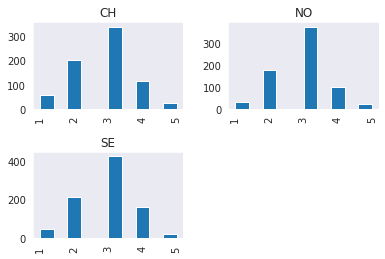

In [25]:
cntry_ess2['sclact'].hist(by=cntry_ess2['cntry']);

Data looks normally distributed. Let's test:

In [26]:
CH_ess = cntry_ess2[cntry_ess2['cntry']=='CH']
NO_ess = cntry_ess2[cntry_ess2['cntry']=='NO']
SE_ess = cntry_ess2[cntry_ess2['cntry']=='SE']

print(stats.describe(CH_ess['sclact']))
print(stats.describe(NO_ess['sclact']))
print(stats.describe(SE_ess['sclact']))

DescribeResult(nobs=743, minmax=(1, 5), mean=2.784656796769852, variance=0.821489336230696, skewness=0.056518838123621226, kurtosis=-0.05699247701187771)
DescribeResult(nobs=712, minmax=(1, 5), mean=2.860955056179775, variance=0.6740289037437381, skewness=0.09364724158452321, kurtosis=0.39039548364910237)
DescribeResult(nobs=867, minmax=(1, 5), mean=2.878892733564014, variance=0.7393576640002557, skewness=-0.07057138165607037, kurtosis=-0.0019064717623313854)


Data is normally distributed. Let's run an ANOVA

In [27]:
stats.f_oneway(CH_ess['sclact'],NO_ess['sclact'],SE_ess['sclact'])

F_onewayResult(statistic=2.598868499168873, pvalue=0.07457422573866376)

The null cannot be rejected. The data for these countries is not significant. It does not seem as though the countries differ from eachother in the number of social activities they partake in per their age group.


---
##Ruff Figural Fluency Test 

This test provides information about nonverbal capacity for initiation, planning, and divergent reasoning.

###1. Is there a significant difference in the number of unique designs drawn by the same participants from Measurement 2 to Measurement 3?


In [28]:
ruff_df = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/rfft.csv')
ruff_df.info()
ruff_df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7545 entries, 0 to 7544
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Casenr         7545 non-null   int64  
 1   Age            7545 non-null   int64  
 2   Gender         7545 non-null   object 
 3   Education      7545 non-null   object 
 4   Measurement    7545 non-null   object 
 5   Unique         7545 non-null   float64
 6   Perseverative  7545 non-null   float64
 7   Interval       7545 non-null   object 
dtypes: float64(2), int64(2), object(4)
memory usage: 471.7+ KB


,Casenr,Age,Gender,Education,Measurement,Unique,Perseverative,Interval
0,1,74,Male,Lower secondary school (ISCED 2),Measurement 1 (2003-2006),32.0,1.0,Not applicable
1,1,74,Male,Lower secondary school (ISCED 2),Measurement 2 (2006-2008),35.0,0.0,2.842122556
2,1,74,Male,Lower secondary school (ISCED 2),Measurement 3 (2008-2012),50.5,14.5,2.201232033
3,2,48,Male,Higher secondary school (ISCED 3-4),Measurement 1 (2003-2006),26.0,3.0,Not applicable
4,2,48,Male,Higher secondary school (ISCED 3-4),Measurement 2 (2006-2008),47.0,3.0,2.762718362
5,2,48,Male,Higher secondary school (ISCED 3-4),Measurement 3 (2008-2012),71.0,0.5,2.376454483
6,3,54,Male,Higher secondary school (ISCED 3-4),Measurement 1 (2003-2006),91.0,11.0,Not applicable
7,3,54,Male,Higher secondary school (ISCED 3-4),Measurement 2 (2006-2008),83.5,21.0,2.628552653
8,3,54,Male,Higher secondary school (ISCED 3-4),Measurement 3 (2008-2012),77.0,17.0,3.392197125
9,4,70,Male,Higher secondary school (ISCED 3-4),Measurement 1 (2003-2006),59.0,49.0,Not applicable


Let's separate the df in to Measure 2 and Measure 3

In [29]:
ruff_m2 = ruff_df[ruff_df['Measurement']=='Measurement 2 (2006-2008)']
ruff_m3 = ruff_df[ruff_df['Measurement']=='Measurement 3 (2008-2012)']
ruff_m2.info()
ruff_m2.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2515 entries, 1 to 7543
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Casenr         2515 non-null   int64  
 1   Age            2515 non-null   int64  
 2   Gender         2515 non-null   object 
 3   Education      2515 non-null   object 
 4   Measurement    2515 non-null   object 
 5   Unique         2515 non-null   float64
 6   Perseverative  2515 non-null   float64
 7   Interval       2515 non-null   object 
dtypes: float64(2), int64(2), object(4)
memory usage: 176.8+ KB


,Casenr,Age,Gender,Education,Measurement,Unique,Perseverative,Interval
1,1,74,Male,Lower secondary school (ISCED 2),Measurement 2 (2006-2008),35.0,0.0,2.842122556
4,2,48,Male,Higher secondary school (ISCED 3-4),Measurement 2 (2006-2008),47.0,3.0,2.762718362
7,3,54,Male,Higher secondary school (ISCED 3-4),Measurement 2 (2006-2008),83.5,21.0,2.628552653
10,4,70,Male,Higher secondary school (ISCED 3-4),Measurement 2 (2006-2008),54.0,39.0,2.762718362
13,5,52,Male,University (ISCED 5-6),Measurement 2 (2006-2008),68.0,16.0,2.844860632


In [30]:
ruff_m3.info()
ruff_m3.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2515 entries, 2 to 7544
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Casenr         2515 non-null   int64  
 1   Age            2515 non-null   int64  
 2   Gender         2515 non-null   object 
 3   Education      2515 non-null   object 
 4   Measurement    2515 non-null   object 
 5   Unique         2515 non-null   float64
 6   Perseverative  2515 non-null   float64
 7   Interval       2515 non-null   object 
dtypes: float64(2), int64(2), object(4)
memory usage: 176.8+ KB


,Casenr,Age,Gender,Education,Measurement,Unique,Perseverative,Interval
2,1,74,Male,Lower secondary school (ISCED 2),Measurement 3 (2008-2012),50.5,14.5,2.201232033
5,2,48,Male,Higher secondary school (ISCED 3-4),Measurement 3 (2008-2012),71.0,0.5,2.376454483
8,3,54,Male,Higher secondary school (ISCED 3-4),Measurement 3 (2008-2012),77.0,17.0,3.392197125
11,4,70,Male,Higher secondary school (ISCED 3-4),Measurement 3 (2008-2012),64.0,11.0,2.650239562
14,5,52,Male,University (ISCED 5-6),Measurement 3 (2008-2012),21.0,0.0,2.247775496


In [31]:
ruff_unique = ruff_df.pivot(index='Casenr', columns='Measurement', values='Unique')
ruff_unique.head()

Measurement,Measurement 1 (2003-2006),Measurement 2 (2006-2008),Measurement 3 (2008-2012)
Casenr,,,
1,32.0,35.0,50.5
2,26.0,47.0,71.0
3,91.0,83.5,77.0
4,59.0,54.0,64.0
5,60.0,68.0,21.0


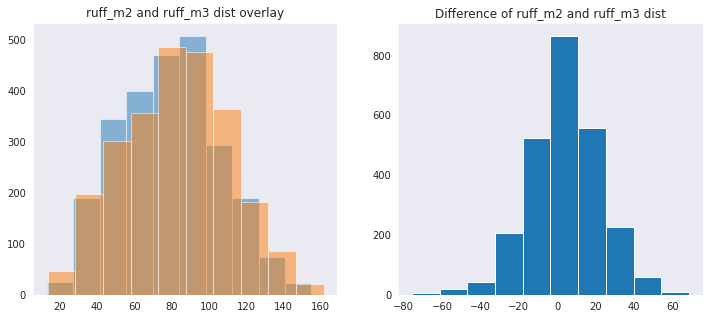

In [32]:
fig, ax = plt.subplots(1,2, figsize = (12,5))

ax[0].hist(ruff_m2['Unique'], alpha=.5)
ax[0].hist(ruff_m3['Unique'], alpha=.5)
ax[1].hist(ruff_unique['Measurement 3 (2008-2012)'] - ruff_unique['Measurement 2 (2006-2008)'])
ax[0].set(title='ruff_m2 and ruff_m3 dist overlay')
ax[1].set(title='Difference of ruff_m2 and ruff_m3 dist');

The histograms look normally distributed. Let's test:

In [33]:
print(stats.describe(ruff_m2['Unique']))
print(stats.describe(ruff_m3['Unique']))
print(stats.describe(ruff_unique['Measurement 3 (2008-2012)'] - ruff_unique['Measurement 2 (2006-2008)']))

DescribeResult(nobs=2515, minmax=(13.0, 155.0), mean=78.69244532803181, variance=707.0341513370058, skewness=0.1471876477093264, kurtosis=-0.5467621966747225)
DescribeResult(nobs=2515, minmax=(13.5, 161.5), mean=82.7079522862823, variance=808.8049884464099, skewness=0.020360395669875728, kurtosis=-0.5479245402887649)
DescribeResult(nobs=2515, minmax=(-75.5, 68.5), mean=4.015506958250497, variance=342.2368318331855, skewness=-0.15837265462838976, kurtosis=0.7823714353134701)


Distributions are normal. Let's run a paired t-test to see if there is a difference in unique designs

In [34]:
stats.ttest_rel(ruff_m2['Unique'], ruff_m3['Unique'])

Ttest_relResult(statistic=-10.88544039426271, pvalue=5.3585747477799544e-27)

In [35]:
print(ruff_m2['Unique'].mean())
print(ruff_m3['Unique'].mean())

78.69244532803181
82.7079522862823


In [36]:
def get_95_ci(array_1, array_2):
    sample_1_n = array_1.shape[0]
    sample_2_n = array_2.shape[0]
    sample_1_mean = array_1.mean()
    sample_2_mean = array_2.mean()
    sample_1_var = array_1.var()
    sample_2_var = array_2.var()
    mean_difference = sample_2_mean - sample_1_mean
    std_err_difference = math.sqrt((sample_1_var/sample_1_n)+(sample_2_var/sample_2_n))
    margin_of_error = 1.96 * std_err_difference
    ci_lower = mean_difference - margin_of_error
    ci_upper = mean_difference + margin_of_error
    return("The difference in means at the 95% confidence interval (two-tail) is between "+str(ci_lower)+" and "+str(ci_upper)+".")

get_95_ci(ruff_m2['Unique'],ruff_m3['Unique'])

'The difference in means at the 95% confidence interval (two-tail) is between 2.4938609363188435 and 5.537152980182152.'

Results are significant. The scores improved from measure 2 to measure 3 by an average of 2.49 to 5.53 points.

###2. Is there a significant difference in the number of perseverative errors drawn by the same participants from Measurement 2 to Measurement 3?

In [37]:
print(ruff_m2['Perseverative'].mean())
print(ruff_m3['Perseverative'].mean())

11.769980119284295
12.100198807157058


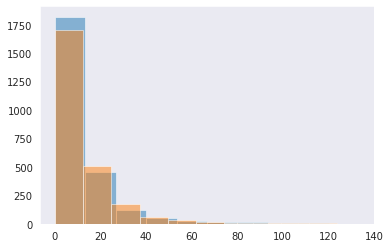

In [38]:
plt.hist(ruff_m2['Perseverative'], alpha=.5)
plt.hist(ruff_m3['Perseverative'], alpha=.5);

In [39]:
print(stats.describe(ruff_m2['Perseverative']))
print(stats.describe(ruff_m3['Perseverative']))

DescribeResult(nobs=2515, minmax=(0.0, 133.5), mean=11.769980119284295, variance=203.46626233055127, skewness=3.2001427277175862, kurtosis=13.913985994081123)
DescribeResult(nobs=2515, minmax=(0.0, 124.0), mean=12.100198807157058, variance=187.75009940357853, skewness=3.03381078165085, kurtosis=13.347862924837408)


As assumed by the chart, the data is indeed not normal

In [40]:
stats.wilcoxon(ruff_m2['Perseverative'], ruff_m3['Perseverative'])

WilcoxonResult(statistic=1358373.0, pvalue=0.0006927535563546565)

The null hypothesis can be rejected. There a significant difference in the number of perseverative errors drawn by the same participants from Measurement 2 to Measurement 3